<a href="https://colab.research.google.com/github/MorbidCuriosity84/DecisionTrees/blob/main/Coursework_2_Final_40428606.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI Coursework 2 - Decisions Tree Classifier**

**Mark Nelson - 40428606**

**WARNING: this will take roughly 9 minutes to run. We do not run all models by default. This can be enabled by changing test_models to True, however this will take roughly 15 minutes.** 

**Please enable GPU hardware acceleration in colab before running.**

First I define all the functions needed to evaluate the dataset and any imports necessary as well as loading the data from the imdb dataset. 

In [1]:
import time
tic = time.perf_counter()
from keras.datasets import imdb
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.util import bigrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
test_models = False


def extract_number_grams(sentences):
    tokens = []
    for sentence in sentences:
      tok = word_tokenize(sentence)      
      for t in tok:
        tokens.append(t)
    return tokens    


def decode_dataset(dataset):
    decoded = [None] * dataset.size
    decoded = np.asarray(decoded)
    index = imdb.get_word_index()
    reverse_index = dict([(value, key) for (key, value) in index.items()])
    for j in range(dataset.size):
        temp = " ".join([reverse_index.get(i - 3, "#") for i in dataset[j]])
        temp = temp.replace("'", "")
        lemmatizer = WordNetLemmatizer() 
        lemmatized = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(temp)]) 
        decoded[j] = lemmatized
    return decoded

def extract_bigrams(sentences): 

    all_bigrams = []
    for sentence in sentences:
      token = word_tokenize(sentence)
      bigrams = ngrams(token,2)
      for b in bigrams:
        all_bigrams.append(b)
    return all_bigrams


"""
def review_to_bow_array(reviews, vectoriser):
    bow_array = []
    for review in reviews:
        review_vector = vectoriser.transform(review)
        review_vector = review_vector.toarray()
        bow_array.append(review_vector)
    return bow_array
"""

(x_train, x_targets), (y_train, y_targets) = imdb.load_data()
tic1 = time.perf_counter()
toc1 = time.perf_counter()
print(f"Completed the code in {toc1 - tic:0.4f} seconds")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Completed the code in 8.6548 seconds


In [2]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Next I decode the dataset, getting the words from the index values

In [3]:
tic2 = time.perf_counter()
x_train_words = decode_dataset(x_train)
y_train_words = decode_dataset(y_train)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 77.3626 seconds


In [4]:
complete_dataset = np.concatenate((x_train_words,y_train_words))

Now we start to analyse the dataset. First, finding the number of reviews in the training and testing dataset and then counting the number of words in each review and finding the average and standard deviation.

In [5]:
tic2 = time.perf_counter()
print("Number of unique words in training dataset: ")
print(len(np.unique(np.hstack(x_train_words))))
print()

print("Number of unique words in testing dataset: ")
print(len(np.unique(np.hstack(y_train_words))))
print()

print("Number of unique words in complete dataset: ")
print(len(np.unique(np.hstack(complete_dataset))))
print()

print("Average review length:")
result = [len(x) for x in x_train_words]
print("Mean %.2f words, std_dev (%f)" % (np.mean(result), np.std(result)))
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Number of unique words in training dataset: 
24902

Number of unique words in testing dataset: 
24801

Number of unique words in complete dataset: 
49580

Average review length:
Mean 1257.58 words, std_dev (950.838487)
Completed the code in 12.7410 seconds


We can see that the average review is around 1258 words in lenght with a standard deviation of 950 words. We could use this information to reduce the maximum size of reviews in order to lower the overheads of the algorithm. 95% of the reviews will fall below two standard deviations of the mean so a max length of 1258 + (2*950) would capture most reviews, discarding anything longer. As this is beyond the scope of this coursework we do not.

We then move on to extracting the unigrams and bigrams using nltk's ngram function. We use pprint to display the 20 most common unigrams and bigrams and their frequencies using nltk's FreqDist function.

In [6]:
tic2 = time.perf_counter()
unigrams = extract_number_grams(complete_dataset)
bigrams = extract_bigrams(complete_dataset)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 80.2079 seconds


In [7]:
common_words = []
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
for i in range(20):
    temp = reverse_index[i+1]
    common_words.append(temp)    
pprint(common_words)

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'br',
 'in',
 'it',
 'i',
 'this',
 'that',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film',
 'on']


In [8]:
tic2 = time.perf_counter()
unigram_freq_complete = nltk.FreqDist(unigrams)
pprint(unigram_freq_complete.most_common(20))
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

[('the', 667947),
 ('a', 414654),
 ('and', 324367),
 ('of', 289408),
 ('to', 268099),
 ('is', 211071),
 ('it', 206501),
 ('br', 201951),
 ('in', 186838),
 ('i', 155026),
 ('this', 150980),
 ('that', 137027),
 ('movie', 103254),
 ('wa', 95608),
 ('film', 93444),
 ('for', 87466),
 ('with', 87359),
 ('but', 83514),
 ('on', 68048),
 ('not', 62831)]
Completed the code in 7.2611 seconds


These two lists are slightly different possibly because of the lemmatization or removal of apostrophes that happens during the decoding of the dataset

In [9]:
tic2 = time.perf_counter()
bigram_freq_complete = nltk.FreqDist(bigrams)
pprint(bigram_freq_complete.most_common(20))
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

[(('br', 'br'), 101060),
 (('of', 'the'), 77306),
 (('in', 'the'), 50278),
 (('this', 'movie'), 31581),
 (('the', 'film'), 27566),
 (('is', 'a'), 27214),
 (('and', 'the'), 26756),
 (('the', 'movie'), 24659),
 (('to', 'the'), 23785),
 (('to', 'be'), 23491),
 (('this', 'film'), 21854),
 (('it', 'is'), 19913),
 (('this', 'is'), 18651),
 (('on', 'the'), 17948),
 (('in', 'a'), 17724),
 (('it', 'wa'), 16917),
 (('one', 'of'), 16273),
 (('for', 'the'), 15928),
 (('with', 'the'), 15756),
 (('of', 'a'), 15710)]
Completed the code in 12.3593 seconds


As can be seen, both thses unigrams contain mostly stopwords or combinations of stopwords, plus linebreak (br). This is unsurprising as these stopwords are the most common words in the English language. We remove these stopwords and then perform the same analysis.

In [10]:
tic2 = time.perf_counter()
from nltk.corpus import stopwords
nltk.download('stopwords')
pprint(stopwords.words('english'))
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'agai

Looking at some of these words, it is clear that some might be worth including (but, not, nor) because they will change the meaning of the following word. We add br and # and remove the words we think will be useful to the classifier.

In [11]:
tic2 = time.perf_counter()
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stop_words(reviews):
    stop_words = set(stopwords.words('english'))
    stop_words.add("br")  # adding line break
    stop_words.add("#")
    stop_words.add('im)')
    stop_words.remove('not')    # removed negation as this will change sentence meaning
    stop_words.remove('nor')    # removed because it can change meaning of following word 
    stop_words.remove('but')    # removed because it can change meaning of following word 
    minus_stop_words = [None] * reviews.size
    j = 0
    for review in reviews:
        review_tok = nltk.word_tokenize(str(review))
        temp_array = np.array([word for word in review_tok if word not in stop_words])
        minus_stop_words[j] = ' '.join(temp_array)
        j +=1
    return minus_stop_words

x_train_minus_stop = remove_stop_words(x_train_words)
unigrams_minus_stop = extract_number_grams(x_train_minus_stop)
bigrams_minus_stop = extract_bigrams(x_train_minus_stop)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Completed the code in 49.7558 seconds


In [12]:
tic2 = time.perf_counter()
unigram_freq = nltk.FreqDist(unigrams_minus_stop)
pprint(unigram_freq.most_common(20))
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

[('movie', 51704),
 ('wa', 48206),
 ('film', 47044),
 ('but', 42609),
 ('not', 31726),
 ('one', 27742),
 ('like', 20742),
 ('ha', 16977),
 ('time', 15961),
 ('good', 15203),
 ('character', 14176),
 ('story', 13172),
 ('even', 12652),
 ('get', 12516),
 ('would', 12238),
 ('make', 12225),
 ('see', 12015),
 ('really', 11738),
 ('well', 10893),
 ('scene', 10594)]
Completed the code in 2.0422 seconds


In [13]:
tic2 = time.perf_counter()
bigram_freq = nltk.FreqDist(bigrams_minus_stop)
pprint(bigram_freq.most_common(20))
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

[(('movie', 'wa'), 2839),
 (('film', 'wa'), 1919),
 (('but', 'not'), 1698),
 (('look', 'like'), 1450),
 (('doe', 'not'), 1350),
 (('movie', 'but'), 1324),
 (('ever', 'seen'), 1316),
 (('wa', 'not'), 1289),
 (('but', 'wa'), 1268),
 (('year', 'old'), 1257),
 (('ive', 'seen'), 1149),
 (('special', 'effect'), 1149),
 (('film', 'but'), 1079),
 (('even', 'though'), 1043),
 (('dont', 'know'), 1033),
 (('im', 'not'), 967),
 (('main', 'character'), 938),
 (('movie', 'ha'), 908),
 (('movie', 'not'), 908),
 (('one', 'best'), 906)]
Completed the code in 3.4097 seconds


We create two visualisations of these unigrams. A graph of the logs of the frequencies and a word cloud.

In [14]:
tic2 = time.perf_counter()
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_freq(freq, title):
    plt.figure(figsize=(15, 7))
    f_array = list(freq.values())
    f_array.sort(reverse=True)
    dist = np.asarray(f_array)
    plt.plot(dist)
    plt.gca().set_xscale('log')
    plt.gca().set_yscale('log')
    plt.title(title)
    plt.xlabel('Rank')
    plt.ylabel('Number of occurrences')
    plt.grid()
    plt.show()

def plot_word_cloud(freq):
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate_from_frequencies(freq)    
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


def plot_bigram_cloud_no_freq(bigram):
    joined_bigrams = join_bigrams(bigram)
    fdist = nltk.FreqDist(joined_bigrams)
    plot_word_cloud(fdist)

def join_bigrams(bigram):
    joined_bigrams = [None] * len(bigram)    
    for i in range(len(bigram)):
      joined_bigrams[i] = " ".join(bigram[i])
    return joined_bigrams


toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 0.0298 seconds


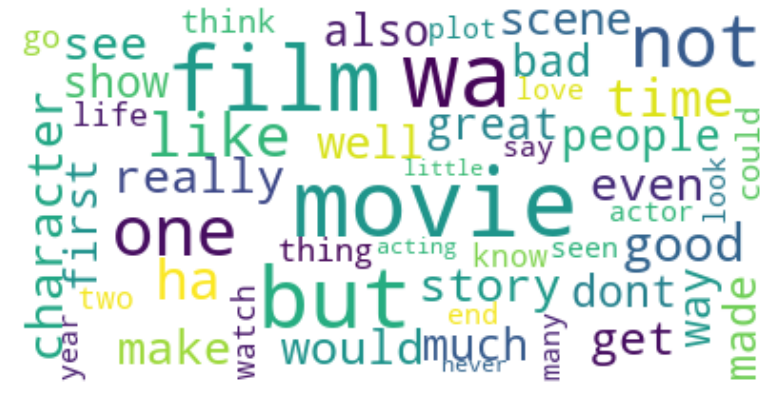

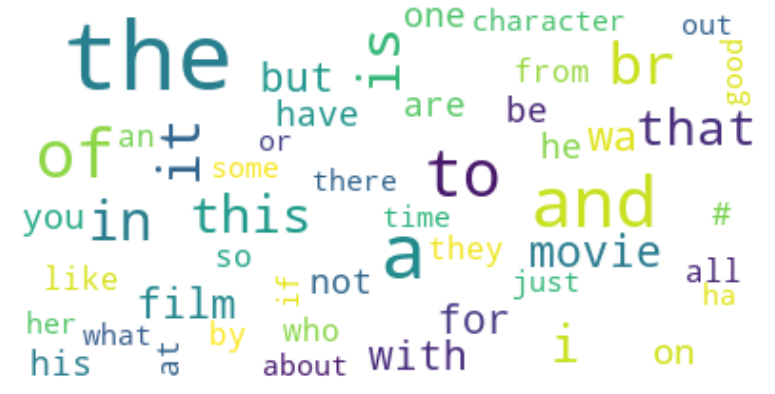

Completed the code in 1.4735 seconds


In [15]:
tic2 = time.perf_counter()
plot_word_cloud(unigram_freq)
plot_word_cloud(unigram_freq_complete)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

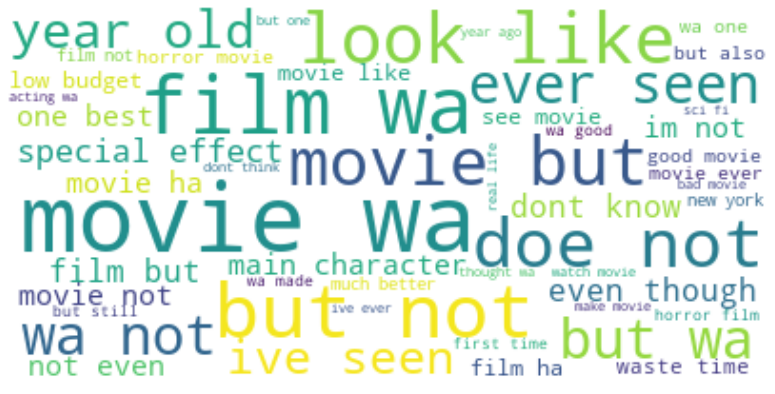

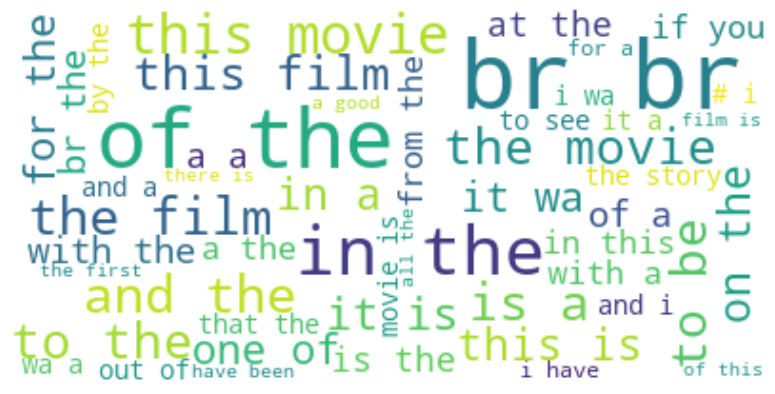

Completed the code in 16.5161 seconds


In [16]:
tic2 = time.perf_counter()
plot_bigram_cloud_no_freq(bigrams_minus_stop)
plot_bigram_cloud_no_freq(bigrams)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

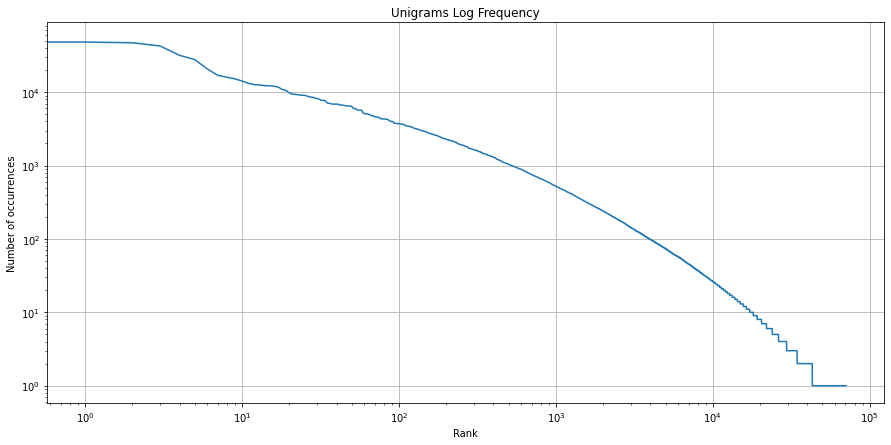

Completed the code in 0.7329 seconds


In [17]:
tic2 = time.perf_counter()
plot_freq(unigram_freq, "Unigrams Log Frequency")
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

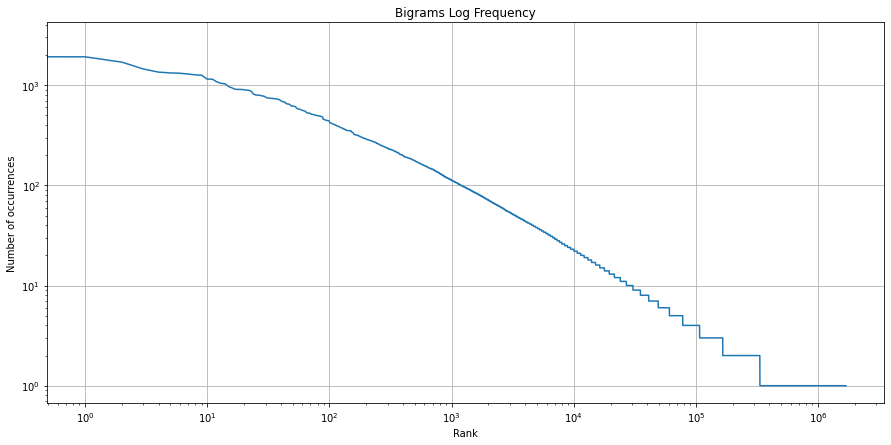

Completed the code in 1.3586 seconds


In [18]:
tic2 = time.perf_counter()
plot_freq(bigram_freq, "Bigrams Log Frequency")
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [19]:
tic2 = time.perf_counter()
y_train_minus_stop = remove_stop_words(y_train_words)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 20.3670 seconds


In [20]:
tic2 = time.perf_counter()
def get_vector(vectorizer, data_train,data_target):
    x_bow = vectorizer.fit_transform(x_data)
    y_bow = vectorizer.transform(y_data)
    return x_bow, y_bow


toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 0.0000 seconds


In [21]:
tic2 = time.perf_counter()
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def fit_model(depth, criterio, vectorizer, x_data, y_data):    
    x_bow = x_data
    y_bow = y_data

    clf = DecisionTreeClassifier(criterion=criterio, max_depth=depth)
    fig = clf.fit(x_bow, x_targets)
    print(clf.score(x_bow, x_targets))
    print(clf.score(y_bow, y_targets))
    y_predict = clf.predict(y_bow)

    print(confusion_matrix(y_predict, y_targets))
    print(classification_report(y_predict, y_targets,target_names=['Neg','Pos'], digits=4))
    print(accuracy_score(y_predict, y_targets))
    return clf


toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 0.0001 seconds


In [22]:
tic2 = time.perf_counter()
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus
def draw_tree(clf, write_tree, draw_tree, filename, vectorizer):
    
    dot_data = tree.export_graphviz(clf,  
                    filled=True, 
                    rounded=True,
                    special_characters=True,
                    feature_names = vectorizer.get_feature_names(),
                    class_names=['Neg','Pos'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    if draw_tree:
        display(graphviz.Source(dot_data))
    if write_tree:
        graph.write_png(filename)


toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 0.0146 seconds


In [23]:
tic2 = time.perf_counter()
unigrams_only_vec = CountVectorizer(ngram_range=(1,1), min_df=10)
bigrams_only_vec = CountVectorizer(ngram_range=(2,2), min_df=10)
trigrams_only_vec = CountVectorizer(ngram_range=(3,3), min_df=10)
unigrams_and_bigrams_vec = CountVectorizer(ngram_range=(1,2), min_df=10)
uni_bi_trigrams_vec = CountVectorizer(ngram_range=(1,3), min_df=10)
bi_trigrams_vec = CountVectorizer(ngram_range=(2,3), min_df=10)

stop_unigrams_only_vec = CountVectorizer(ngram_range=(1,1), min_df=10)
stop_bigrams_only_vec = CountVectorizer(ngram_range=(2,2), min_df=10)
stop_trigrams_only_vec = CountVectorizer(ngram_range=(3,3), min_df=10)
stop_unigrams_and_bigrams_vec = CountVectorizer(ngram_range=(1,2), min_df=10)
stop_uni_bi_trigrams_vec = CountVectorizer(ngram_range=(1,3), min_df=10)
stop_bi_trigrams_vec = CountVectorizer(ngram_range=(2,3), min_df=10)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 0.0002 seconds


In [24]:
tic2 = time.perf_counter()
def train_rfc(critrn, num_est, depth,x_data,y_data,vectorizer):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=num_est,criterion=critrn,max_depth=depth, n_jobs=-1)    
    x_bow = x_data
    y_bow = y_data
    rfc.fit(x_bow,x_targets)
    print("Training acc:", rfc.score(x_bow, x_targets), "\nValidation acc:", rfc.score(y_bow, y_targets))
    y_predict = rfc.predict(y_bow)
    print(confusion_matrix(y_predict, y_targets))
    print(classification_report(y_predict, y_targets,digits=4,target_names=['Neg','Pos']))
    print(accuracy_score(y_predict, y_targets))    
    return rfc


def draw_rfc_tree(rfc,filename,show_tree,vectorizer):  
    dot_data = export_graphviz(rfc.estimators_[5],  
                    filled=True, 
                    rounded=True,
                    special_characters=True,
                    feature_names = vectorizer.get_feature_names(),
                    class_names=['Neg','Pos'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    if show_tree:
        display(graphviz.Source(dot_data))
    #if write_tree:
    graph.write_png(filename)


toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 0.0002 seconds


In [25]:
tic2 = time.perf_counter()
x_bow_uni_tri_no_stop = uni_bi_trigrams_vec.fit_transform(x_train_minus_stop)
y_bow_uni_tri_no_stop = uni_bi_trigrams_vec.transform(y_train_minus_stop)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Completed the code in 34.5946 seconds


These results might vary from run to run because of how the Random Forest Classifier acts when subsampling. Thses variations have shown to be minor (less than 0.5%)

In [26]:
tic2 = time.perf_counter()
rfc_uni_tri_no_limit = train_rfc("gini",100,None,x_bow_uni_tri_no_stop,y_bow_uni_tri_no_stop,uni_bi_trigrams_vec)
toc2 = time.perf_counter()
print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

Training acc: 1.0 
Validation acc: 0.85564
[[10684  1793]
 [ 1816 10707]]
              precision    recall  f1-score   support

         Neg     0.8547    0.8563    0.8555     12477
         Pos     0.8566    0.8550    0.8558     12523

    accuracy                         0.8556     25000
   macro avg     0.8556    0.8556    0.8556     25000
weighted avg     0.8556    0.8556    0.8556     25000

0.85564
Completed the code in 44.4371 seconds


Because of the size of the tree, we don't visualise it here, instead we write it to a file. This allows the tree to be explored. If you wish to visualise the tree here, set False to True.

In [27]:
draw_rfc_tree(rfc_uni_tri_no_limit,"RFC-No-limit-Tree.png",False,uni_bi_trigrams_vec)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.38894 to fit
tcmalloc: large alloc 2245591040 bytes == 0x56445665c000 @  0x7f837167a001 0x7f836d9111fa 0x7f836d9112ad 0x7f836ea9c6df 0x7f836ef93261 0x7f8371410468 0x7f8371412d53 0x56444ee9c092 0x7f8370dc5bf7 0x56444ee9c12a



Everything below here is only for evaluating the model results. These can be found in the accompanying tables. They can be executed by changing the test_models variable in the first code block to true.

In [28]:
if test_models:
  tic2 = time.perf_counter()
  x_bow_uni_no_stop = unigrams_only_vec.fit_transform(x_train_minus_stop)
  y_bow_uni_no_stop = unigrams_only_vec.transform(y_train_minus_stop)
  x_bow_uni_bi_no_stop = unigrams_and_bigrams_vec.fit_transform(x_train_minus_stop)
  y_bow_uni_bi_no_stop = unigrams_and_bigrams_vec.transform(y_train_minus_stop)
  x_bow_bi_no_stop = bigrams_only_vec.fit_transform(x_train_minus_stop)
  y_bow_bi_no_stop = bigrams_only_vec.transform(y_train_minus_stop)
  x_bow_tri_no_stop = trigrams_only_vec.fit_transform(x_train_minus_stop)
  y_bow_tri_no_stop = trigrams_only_vec.transform(y_train_minus_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [29]:
if test_models:
  tic2 = time.perf_counter()
  x_bow_uni_stop = stop_unigrams_only_vec.fit_transform(x_train_words)
  y_bow_uni_stop = stop_unigrams_only_vec.transform(y_train_words)
  x_bow_uni_bi_stop = stop_unigrams_and_bigrams_vec.fit_transform(x_train_words)
  y_bow_uni_bi_stop = stop_unigrams_and_bigrams_vec.transform(y_train_words)
  x_bow_uni_tri_stop = stop_uni_bi_trigrams_vec.fit_transform(x_train_words)
  y_bow_uni_tri_stop = stop_uni_bi_trigrams_vec.transform(y_train_words)
  x_bow_bi_stop = stop_bigrams_only_vec.fit_transform(x_train_words)
  y_bow_bi_stop = stop_bigrams_only_vec.transform(y_train_words)
  x_bow_tri_stop = stop_trigrams_only_vec.fit_transform(x_train_words)
  y_bow_tri_stop = stop_trigrams_only_vec.transform(y_train_words)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [30]:
if test_models:
  tic2 = time.perf_counter()
  trigram_clf = fit_model(15,"gini",uni_bi_trigrams_vec,x_bow_uni_tri_no_stop, y_bow_uni_tri_no_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [31]:
if test_models:
  tic2 = time.perf_counter()
  trigram_clf_5 = fit_model(5,"gini",uni_bi_trigrams_vec,x_bow_uni_tri_no_stop, y_bow_uni_tri_no_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [32]:
if test_models:
  tic2 = time.perf_counter()
  bigram_clf = fit_model(15,'gini',unigrams_and_bigrams_vec,x_bow_uni_bi_no_stop, y_bow_uni_bi_no_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [33]:
if test_models:
  tic2 = time.perf_counter()
  bigram_clf_5 = fit_model(5,'gini',unigrams_and_bigrams_vec,x_bow_uni_bi_no_stop, y_bow_uni_bi_no_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [34]:
if test_models:
  tic2 = time.perf_counter()
  unigram_clf = fit_model(15,'gini',unigrams_only_vec,x_bow_uni_no_stop, y_bow_uni_no_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [35]:
#tic2 = time.perf_counter()
#unigram_clf = fit_model(15,'gini',unigrams_only_vec,x_bow_uni_stop, y_bow_uni_stop)
#toc2 = time.perf_counter()
#print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [36]:
if test_models:
  tic2 = time.perf_counter()
  unigram_clf_5 = fit_model(5,'gini',unigrams_only_vec,x_bow_uni_no_stop, y_bow_uni_no_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [37]:
if test_models:
  tic2 = time.perf_counter()
  unigram_with_stop = fit_model(15,"gini",stop_unigrams_only_vec,x_bow_uni_stop,y_bow_uni_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [38]:
if test_models:
  tic2 = time.perf_counter()
  uni_bigrams_with_stop5 = fit_model(15,"gini",unigrams_and_bigrams_vec,x_bow_uni_bi_stop,y_bow_uni_bi_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [39]:
if test_models:
  tic2 = time.perf_counter()
  uni_bi_trigrams_with_stop5 = fit_model(15,"gini",uni_bi_trigrams_vec,x_bow_uni_tri_stop,y_bow_uni_tri_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [40]:
if test_models:
  tic2 = time.perf_counter()
  rfc_unigram15 = train_rfc("entropy",100,15,x_bow_uni_no_stop,y_bow_uni_no_stop,unigrams_only_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [41]:
if test_models:
  tic2 = time.perf_counter()
  rfc_unigram25 = train_rfc("gini",100,5,x_bow_uni_no_stop,y_bow_uni_no_stop,unigrams_only_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [42]:
if test_models:
  tic2 = time.perf_counter()
  rfc_uni_bigram15 = train_rfc("gini",100,15,x_bow_uni_bi_no_stop,y_bow_uni_bi_no_stop,unigrams_and_bigrams_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [43]:
if test_models:
  tic2 = time.perf_counter()
  rfc_uni_bigram5 = train_rfc("gini",100,5,x_bow_uni_bi_no_stop,y_bow_uni_bi_no_stop,unigrams_and_bigrams_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [44]:
if test_models:
  tic2 = time.perf_counter()
  rfc_uni_tri15 = train_rfc("gini",100,15,x_bow_uni_tri_no_stop,y_bow_uni_tri_no_stop,uni_bi_trigrams_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [45]:
if test_models:
  tic2 = time.perf_counter()
  rfc_uni_tri5 = train_rfc("gini",100,5,x_bow_uni_tri_no_stop,y_bow_uni_tri_no_stop,uni_bi_trigrams_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [46]:
if test_models:
  tic2 = time.perf_counter()
  rfc_unigram_only15_stop = train_rfc("gini",100,15,x_bow_uni_stop,y_bow_uni_stop,stop_unigrams_only_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [47]:
if test_models:
  tic2 = time.perf_counter()
  rfc_uni_bigram15_stop = train_rfc("gini",100,15,x_bow_uni_bi_stop,y_bow_uni_bi_stop,stop_unigrams_and_bigrams_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [48]:
if test_models:
  tic2 = time.perf_counter()
  rfc_uni_tri15_stop = train_rfc("gini",100,15,x_bow_uni_tri_stop,y_bow_uni_tri_stop,stop_uni_bi_trigrams_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [49]:
if test_models:
  tic2 = time.perf_counter()
  rfc_uni_tri_no_limit = train_rfc("gini",100,None,x_bow_uni_tri_no_stop,y_bow_uni_tri_no_stop,uni_bi_trigrams_vec)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [50]:
if test_models:
  tic2 = time.perf_counter()
  trigram_clf = fit_model(None,"gini",uni_bi_trigrams_vec,x_bow_uni_tri_no_stop, y_bow_uni_tri_no_stop)
  toc2 = time.perf_counter()
  print(f"Completed the code in {toc2 - tic2:0.4f} seconds")

In [51]:
toc = time.perf_counter()
print(f"Completed the code in {toc - tic:0.4f} seconds")

Completed the code in 527.5067 seconds
